# barotropic streamfunction

Chris Bull (28/6/24) 

This draft notebook plots the barotropic streamfunction for each model as the time mean of the last available year for Ocean0, Ocean1 and Ocean2 COM runs.

Heavily hacked from OverturningStreamfunction.ipynb (thanks Adele!)

See https://github.com/misomip/isomip-plus/issues/6#issuecomment-2167202395

In [77]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cftime
import cmocean as cm

from netCDF4 import Dataset
import os.path
import matplotlib.colors as colors

In [78]:
## folder where the isomip-plus github repo is located
baserepo = '/home/chris/VBoxSHARED/repos/isomip-plus/'
## folder where you downloaded the zipped Google Drive data
basedrive = '/home/chris/VBoxSHARED/ISOMIP_Data2/'

# load the data from the text files, which point to the right location of the file in the drive structure
Ocean0_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean0_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)


In [80]:
def pbsf(expt,suptitle,tsteps,customlim=1):
    labels = []
    for fileIndex in range(len(expt)):
        fileName = expt[fileIndex]
        baseName = os.path.basename(basedrive +fileName)
        modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
        labels.append(modelName)
    length = len(expt)
    alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
    nrows = int(np.ceil(length/3))
    fig = plt.figure(figsize=(20,10),facecolor='w',dpi = 150)
    time = tsteps
    for i in np.arange(length):
        plt.subplot(3,nrows,i+1)
        data = xr.open_dataset(basedrive+expt[i], decode_times=False)
        #print(data.nTime)
        mr = data.barotropicStreamfunction.isel(nTime = np.arange(time-13,time)).mean('nTime')
        # last year of time
        #mr['nz'] = mr.nz*5+2.5 # add depth (2.5,7.5 etc)
        mr['ny'] = mr.ny*2+321
        mr['nx'] = mr.nx*2+321
        # mr<1e36 is to get rid of NaNs.
        c = (mr.where(mr <1e36)/1e6).plot.contourf(cmap = cm.cm.curl, levels = np.linspace(-customlim,customlim,41),extend = 'both',add_colorbar = False)#, cbar_kwargs = {'label':'Overturning \n Streamfunction (Sv)'},extend = 'both')
        ls = (mr.where(mr <1e36)/1e6).plot.contour( levels = np.linspace(-customlim,customlim,21), colors = 'k', linewidths = 0.4)

        plt.title('('+alphabet[i]+') '+labels[i], fontsize = 16)
        if (i==0) or (i==4) or (i==8):
            plt.ylabel('y (km)')
        else:
            plt.ylabel('')
        if i>=8:
            plt.xlabel('x (km)')
        else:
            plt.xlabel('')


    cax = plt.axes([0.93,0.1,0.01,0.8])
    cbar = plt.colorbar(c, cax = cax)
    cbar.ax.set_ylabel('Barotropic Streamfunction (Sv)', fontsize = 16)
    #cbar.add_lines(ls)
    fig.subplots_adjust(wspace = 0.2, hspace = 0.35)

    fig.suptitle(suptitle, fontsize = 20);

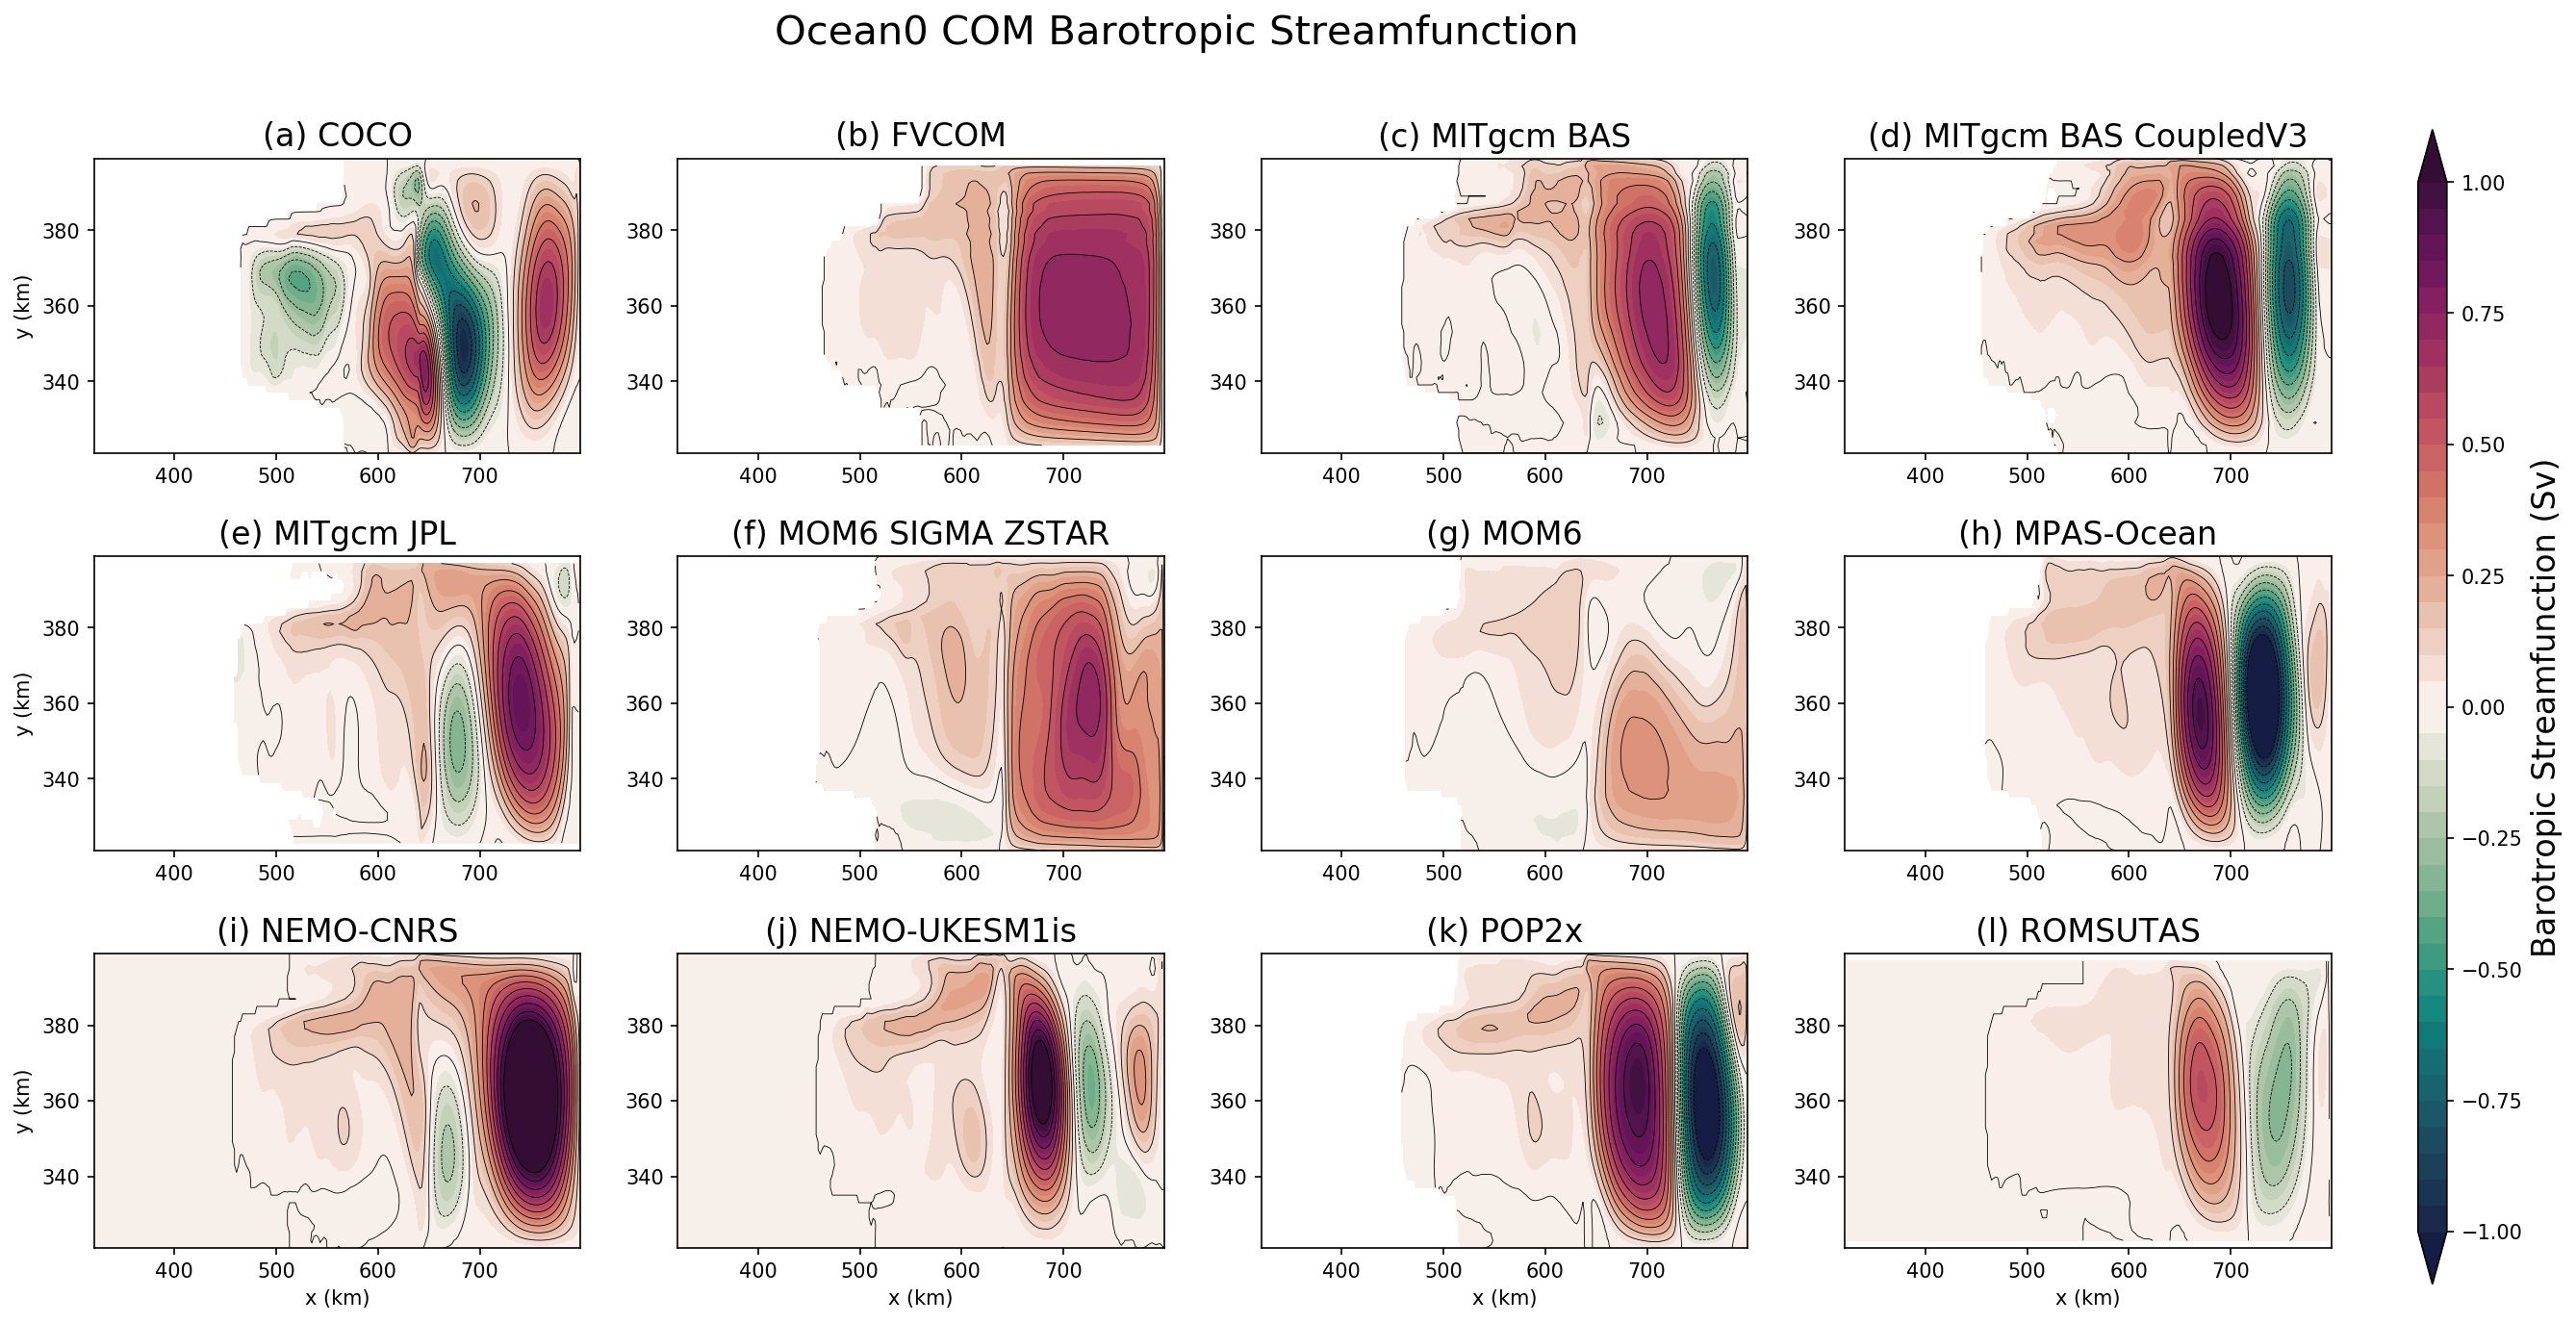

In [81]:
expt = Ocean0_COM
pbsf(expt,'Ocean0 COM Barotropic Streamfunction',12)

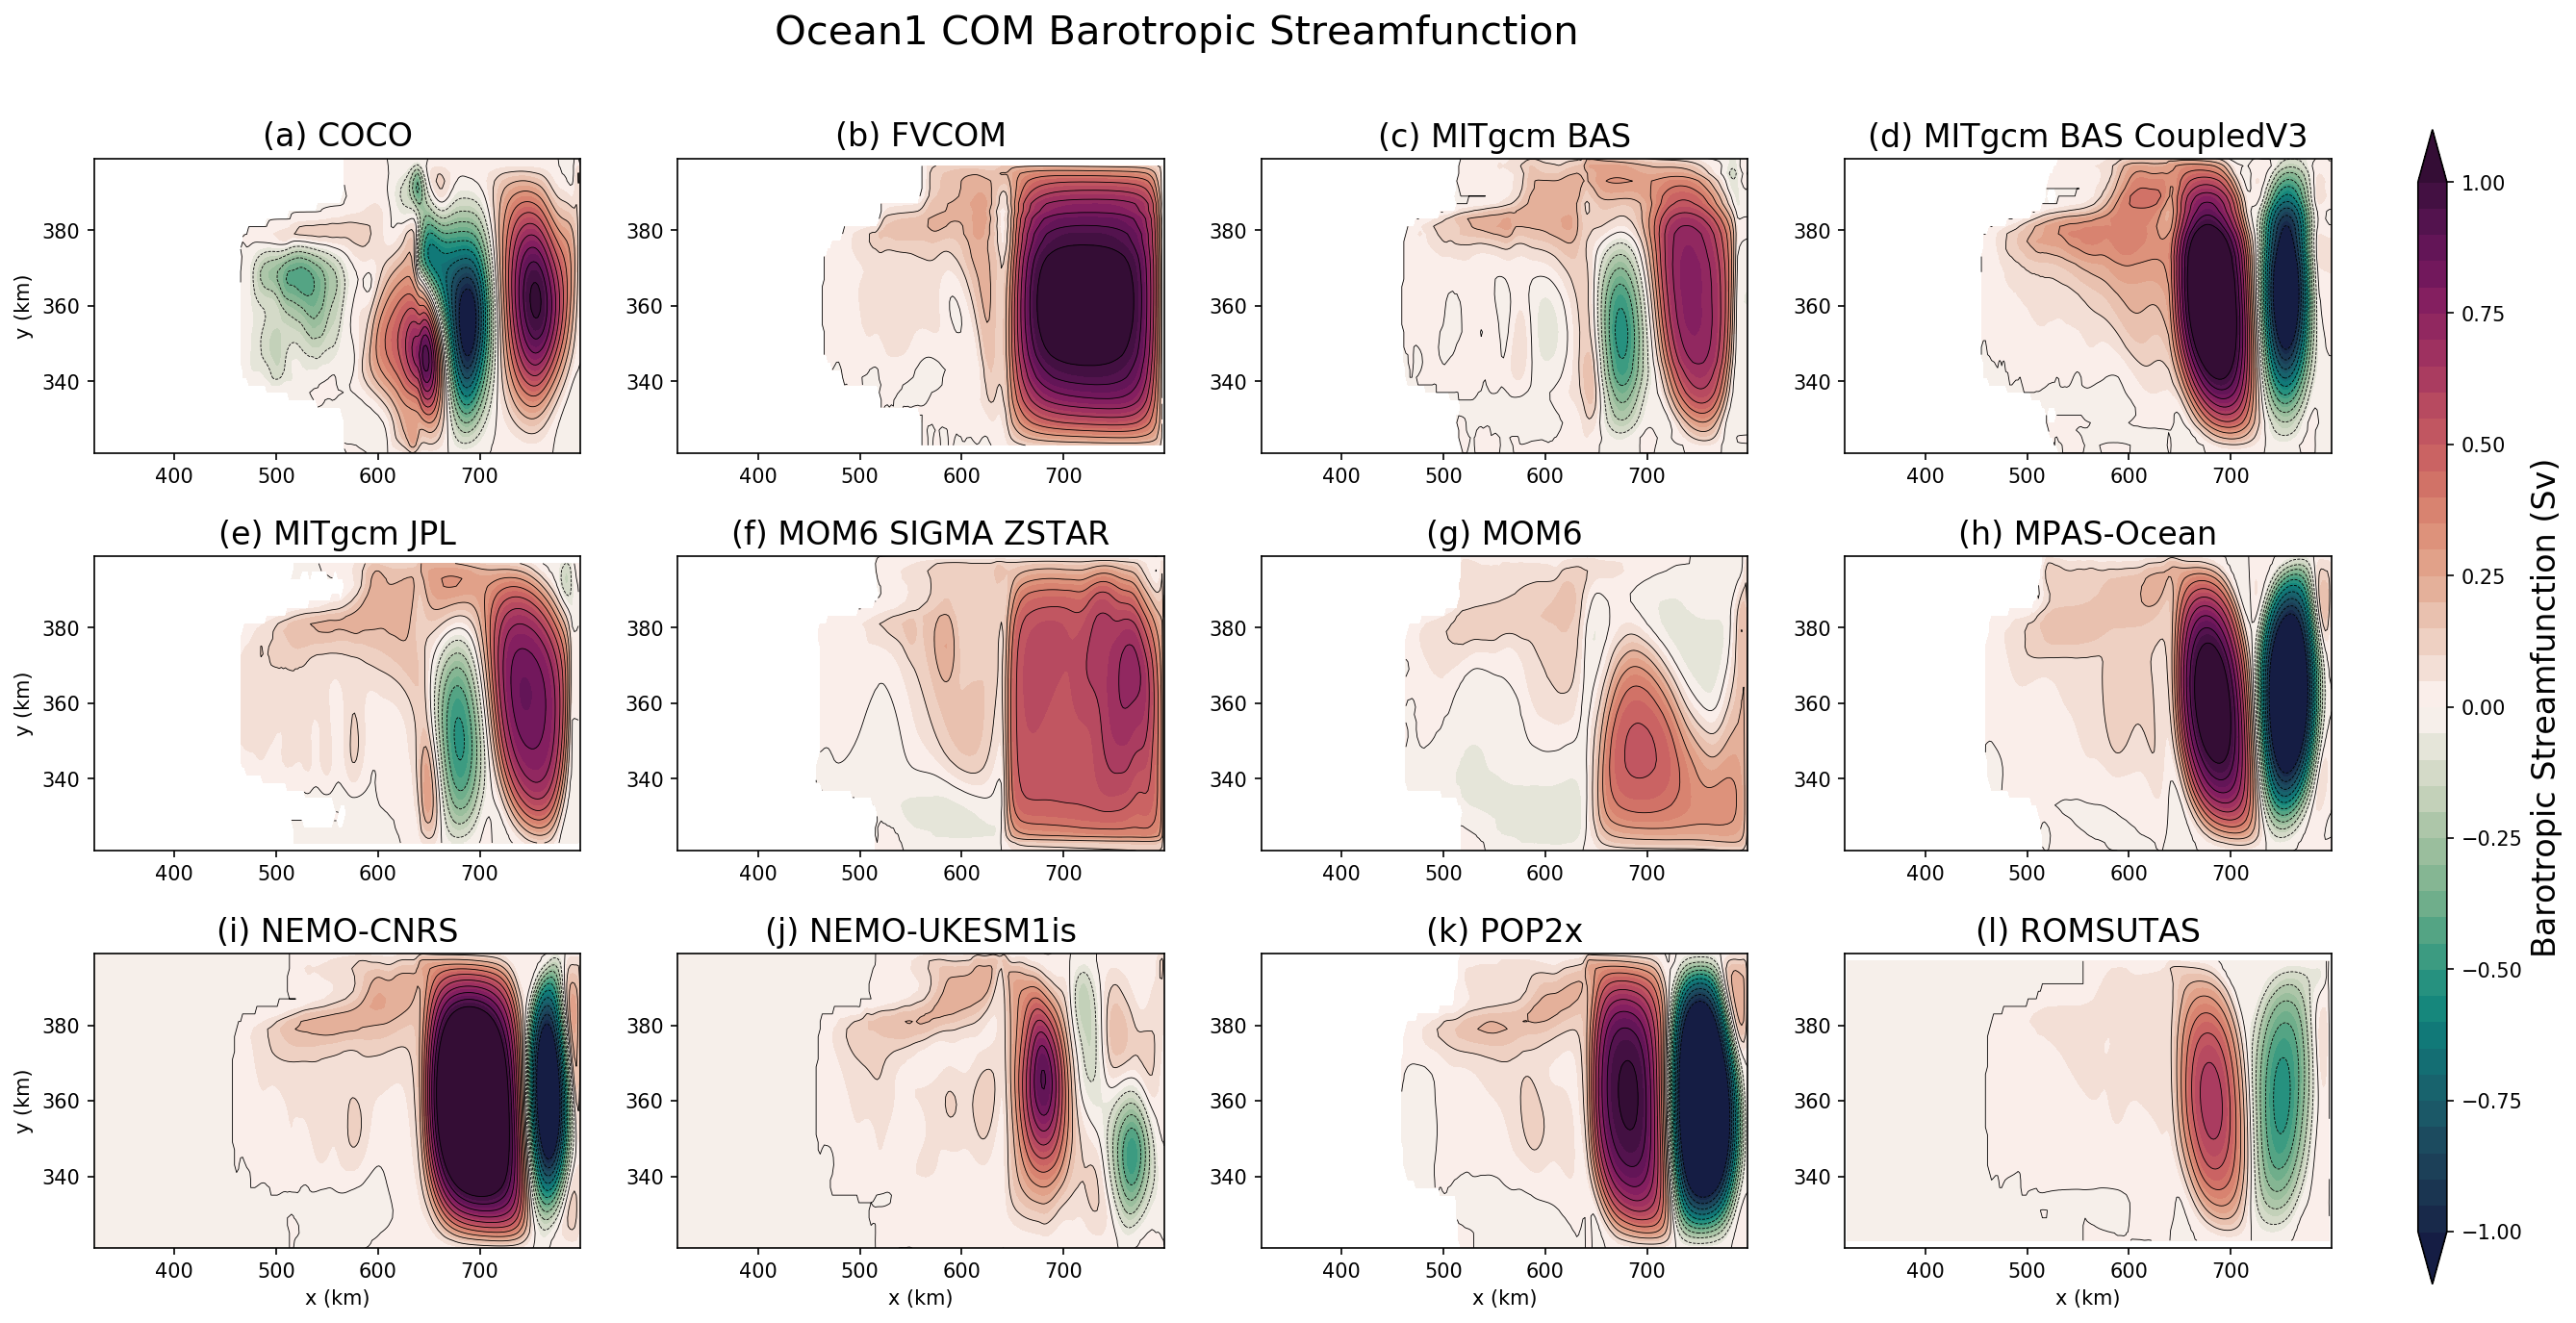

In [82]:
expt = Ocean1_COM
pbsf(expt,'Ocean1 COM Barotropic Streamfunction',240)

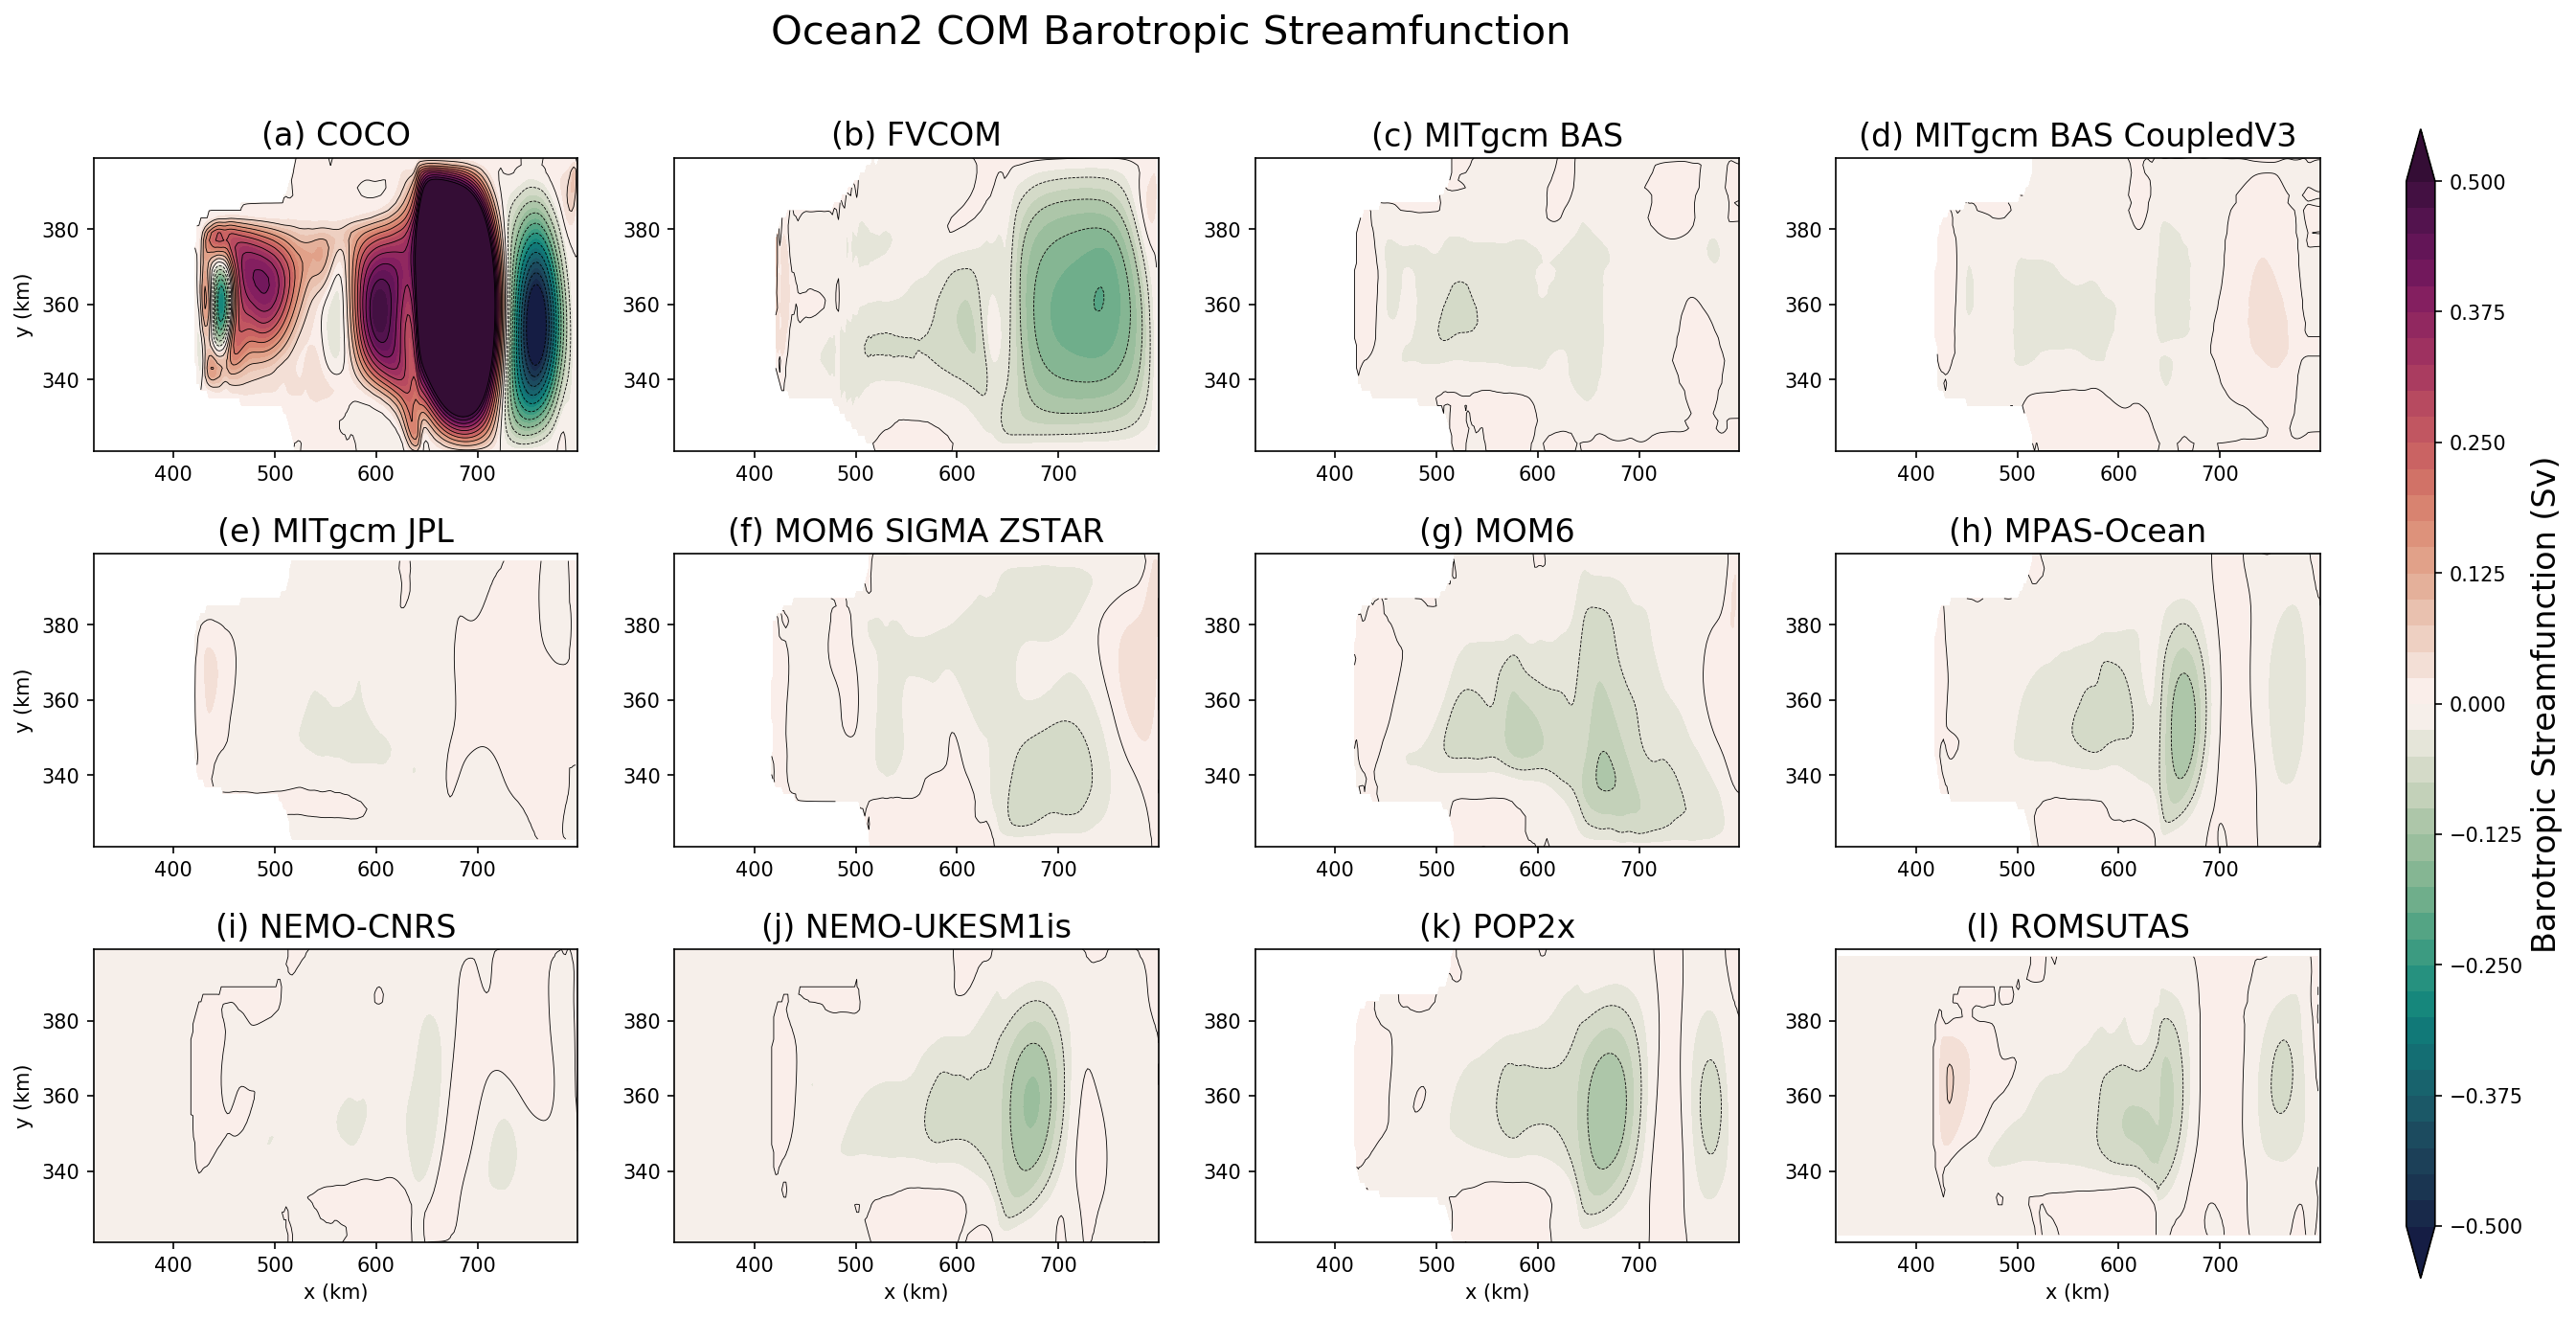

In [83]:
expt = Ocean2_COM
pbsf(expt,'Ocean2 COM Barotropic Streamfunction',240,0.5)